In [9]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np


In [10]:
data = yf.download('TSLA', start='2021-05-23', end='2023-05-23',interval='1d')
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-05-24,193.866669,204.826660,191.216660,202.146667,202.146667,103674300
2021-05-25,202.436661,204.663330,198.570007,201.563339,201.563339,84017700
2021-05-26,202.520004,208.723328,200.500000,206.376663,206.376663,85917900
2021-05-27,206.746674,210.376663,205.403336,210.283340,210.283340,79111800
2021-05-28,209.500000,211.863327,207.460007,208.406662,208.406662,68211000
...,...,...,...,...,...,...
2023-05-16,165.649994,169.520004,164.350006,166.520004,166.520004,98288800
2023-05-17,168.410004,174.500000,167.190002,173.860001,173.860001,125473600
2023-05-18,174.220001,177.059998,172.449997,176.889999,176.889999,109520300


In [11]:
def sma(period,series):
    sma_points=[]
    for i in range(0,len(series)-period+1):        
        sum_value= series[i:i+period].sum()
        mean = sum_value/period
        sma_points.append(mean)
    return sma_points
#EMA(Today)= Price(Today)*k +EMA(Yesterday)*(1-k)
def ema(period,series):
    sf=2/(period+1)
    ema_points=[]
    ema_points.append((series[0])*sf + sma(period,series)[0]*(1-sf))
    ema_temp = (series[0])*sf + sma(period,series)[0]*(1-sf)
    for i in range(1,len(series)):
        ema_val = series[i]*sf + ema_temp*(1-sf)
        ema_temp = ema_val
        ema_points.append(ema_val)
    return (ema_points)


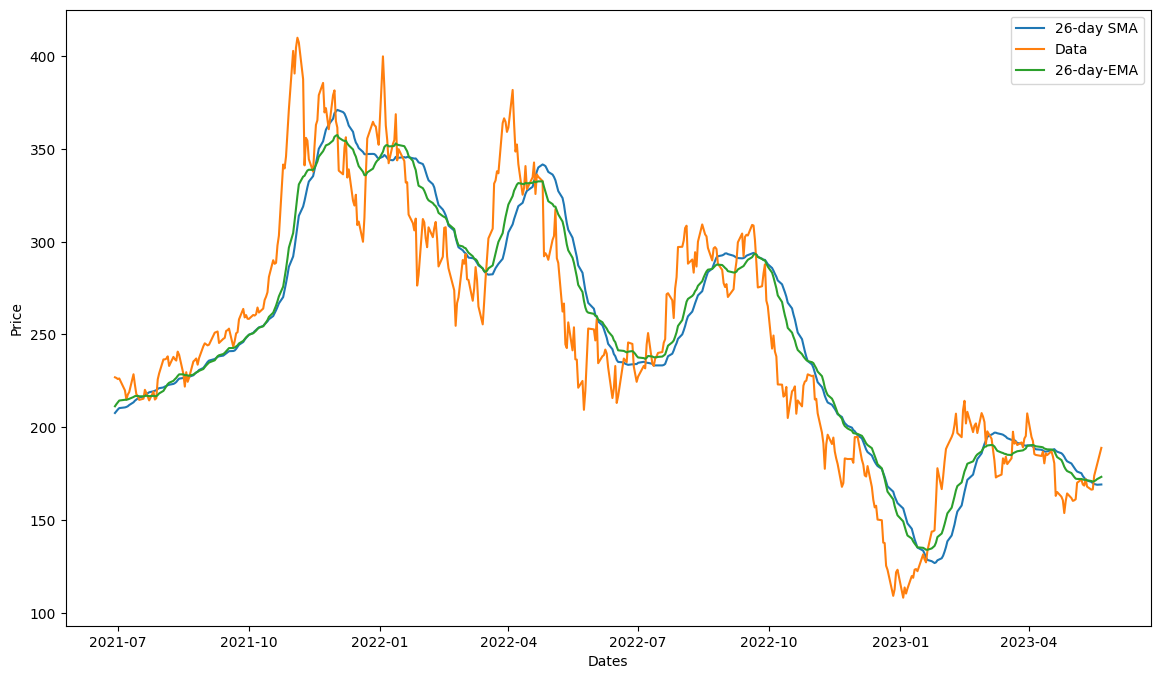

In [12]:
#26 DAY EMA
plt.figure(figsize=(14, 8))
plt.plot(data.index[25:],sma(26,data['Close']))
plt.plot(data.index[25:],data['Close'].iloc[25:])
plt.plot(data.index[25:],ema(26,data['Close'])[25:])

plt.xlabel('Dates')
plt.ylabel('Price')
plt.legend(loc='best', labels=['26-day SMA','Data','26-day-EMA'])

plt.show()


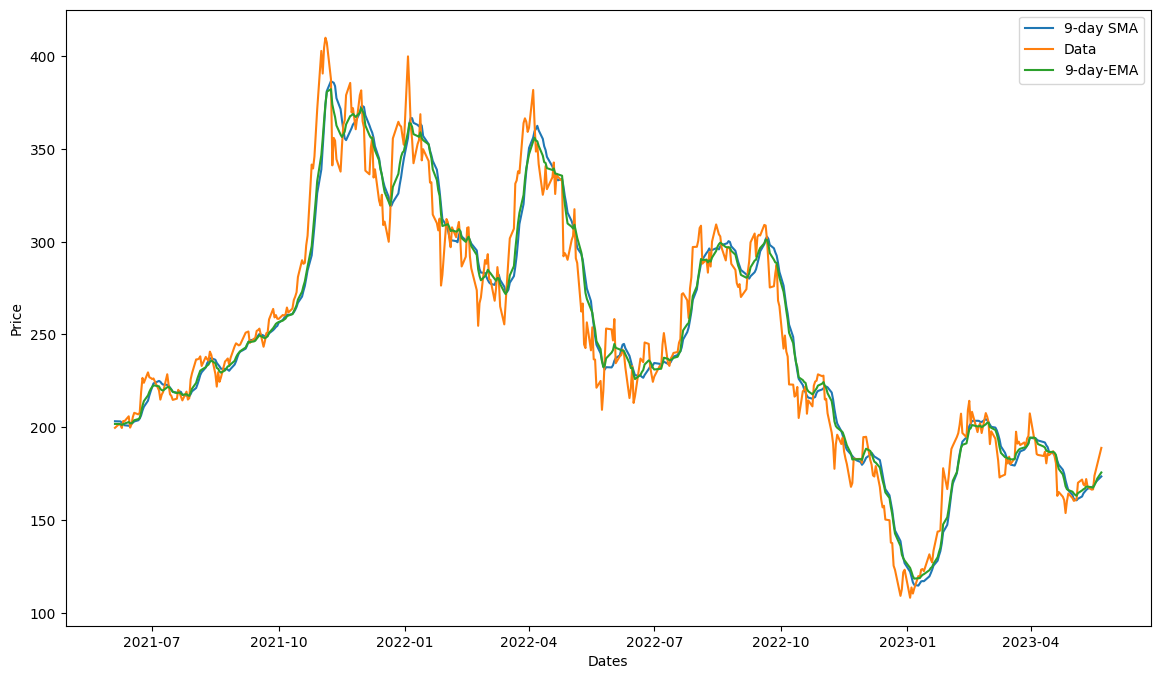

In [13]:
plt.figure(figsize=(14, 8))
plt.plot(data.index[8:],sma(9,data['Close']))
plt.plot(data.index[8:],data['Close'].iloc[8:])
plt.plot(data.index[8:],ema(9,data['Close'])[8:])

plt.xlabel('Dates')
plt.ylabel('Price')
plt.legend(loc='best', labels=['9-day SMA','Data','9-day-EMA'])

plt.show()

In [14]:
macd=[element1 - element2 for (element1, element2) in zip(ema(9,data['Close']), ema(26,data['Close']))]
macd = np.array(macd)


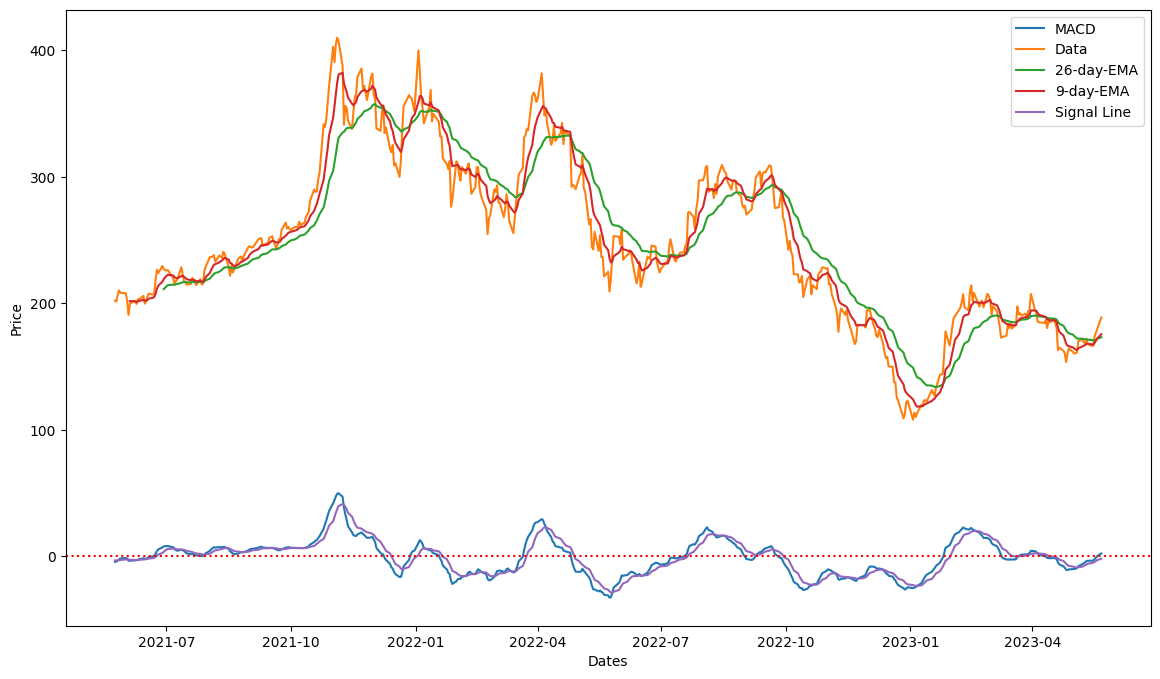

In [15]:
plt.figure(figsize=(14, 8))
plt.plot(data.index,macd)
plt.plot(data.index,data['Close'])
plt.plot(data.index[25:],ema(26,data['Close'])[25:])
plt.plot(data.index[8:],ema(9,data['Close'])[8:])
plt.plot(data.index,ema(9,macd))
plt.xlabel('Dates')
plt.ylabel('Price')
plt.legend(loc='best', labels=['MACD','Data','26-day-EMA','9-day-EMA','Signal Line'])
plt.axhline(0, color='red', linestyle='dotted')
plt.show()

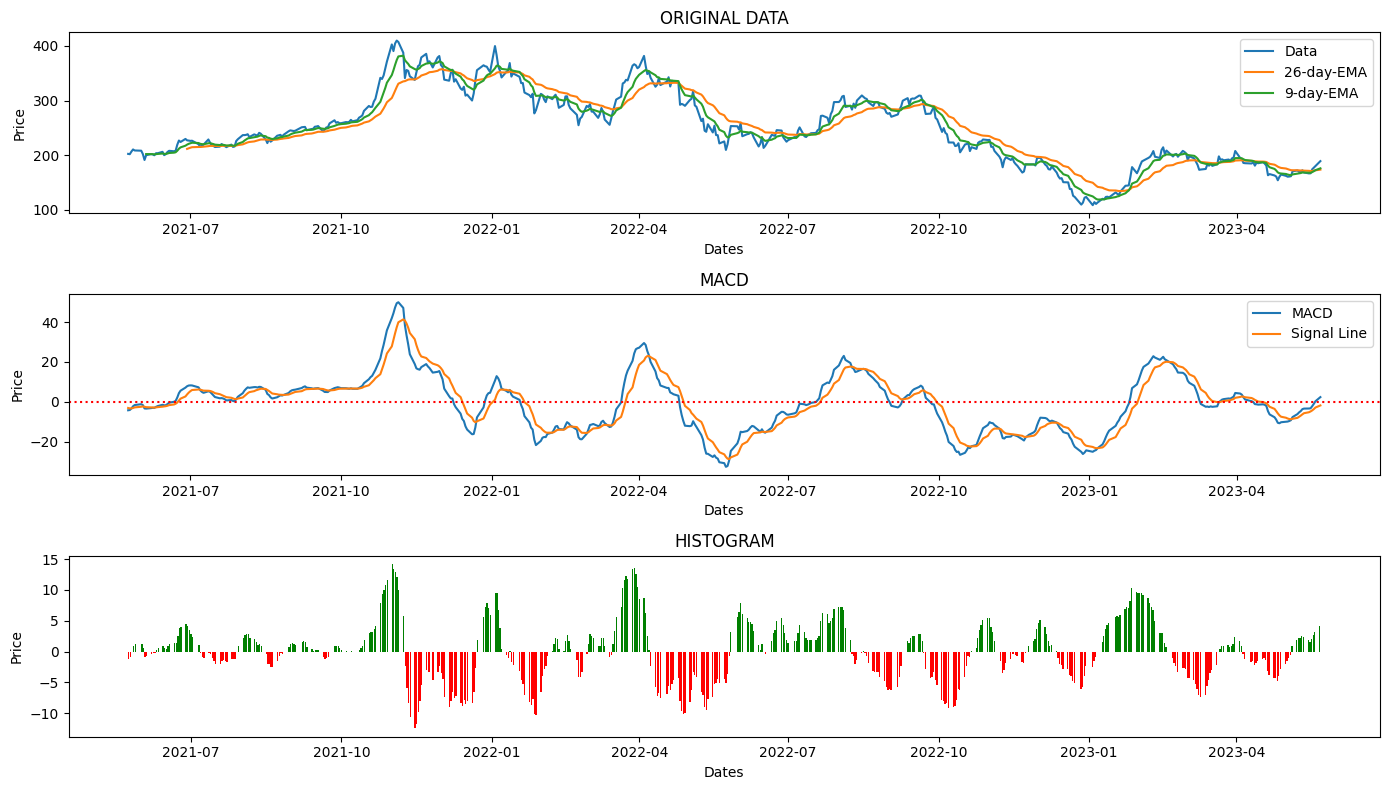

In [16]:
#original data
plt.figure(figsize=(14, 8))
plt.subplot(3 , 1 ,1)
plt.title('ORIGINAL DATA')
plt.plot(data.index,data['Close'])
plt.plot(data.index[25:],ema(26,data['Close'])[25:])
plt.plot(data.index[8:],ema(9,data['Close'])[8:])
plt.legend(loc='best', labels=['Data','26-day-EMA','9-day-EMA'])
plt.xlabel('Dates')
plt.ylabel('Price')
#macd and signal line
plt.subplot(3,1,2)
plt.title('MACD')
plt.plot(data.index,macd)
plt.plot(data.index,ema(9,macd))
plt.axhline(0, color='red', linestyle='dotted')
plt.legend(loc='best', labels=['MACD','Signal Line'])
plt.xlabel('Dates')
plt.ylabel('Price')
#histograph
diff = np.array(macd) - np.array(ema(9,macd))
colors = ['red' if d < 0 else 'green' for d in diff]
plt.subplot(3,1,3)
plt.bar(data.index,np.array(macd)-np.array(ema(9,macd)),color=colors)
plt.ylabel('Price')
plt.xlabel('Dates')
plt.title('HISTOGRAM')
plt.tight_layout()